In [ ]:
#====================================
# Deep Learning Dojo V1 - CNN
# Joshuah Touyz
#====================================

In [1]:
# ======================
#  Importing Librarires
# ======================
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# For reproducibility
np.random.seed(123) 

/Users/brodyvogel/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten

# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D

# Tools for data transformation
from keras.utils import np_utils

In [3]:
# =============================
#  Importing images from MNIST
# =============================
from keras.datasets import mnist


(60000, 28, 28)


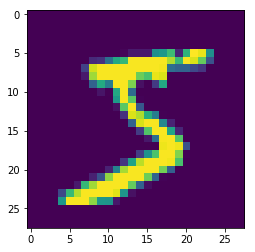

In [5]:
 # This is pretty neat
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape check and plotting
print(X_train.shape)
plt.imshow(X_train[0])

In [7]:
# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for MNIST
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(Y_train.shape)

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)


In [8]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Setting up the fully connected lauer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print (model.summary())

(None, 26, 26, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0 

In [9]:
# =========================================
# Multigpu support Function Make-Parallel
# ========================================
# MultiGPU hack: 
# https://github.com/rossumai/keras-multi-gpu/tree/master/keras_tf_multigpu

# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=128,
         verbose = 0)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(X_test, Y_test, verbose=1)


KeyboardInterrupt: 

In [63]:
np.argmax(model.predict(X_test[0:2**9],batch_size=32, verbose=1),axis=1)

384/512 [=====================>........] - ETA: 0s

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6,
       5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5,
       1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3,
       0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6,
       4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7,
       4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1,
       6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4,
       6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0,
       8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9,
       5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7,
       3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9,
       5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4,
       1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2,
       8, 4,